In [3]:
import wave, struct

def readwave(filename):
    wav = wave.open(filename,'rb')
    (nchannels, sampwidth, framerate, nframes, comptype, compname) = wav.getparams()
    frames = wav.readframes(nframes)# http://docs.python.org/library/struct.html
    if sampwidth == 1:
        data = struct.unpack('%sB' % (nframes * nchannels), frames) # 8 bit : unsigned char
    elif sampwidth == 2:
        data = struct.unpack('%sh' % (nframes * nchannels), frames) # 16 bits : signed short
    return data

In [4]:
data = readwave('zzz.wav')

In [5]:
print(data)

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

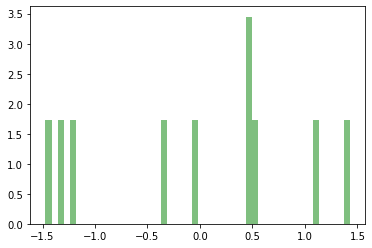

In [84]:
import scipy.io
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
from random import gauss

x = [gauss(0,1) for i in range(10)] 

num_bins = 50
n, bins, patches = plt.hist(x, num_bins, density=1, facecolor='green', alpha=0.5)

plt.show()

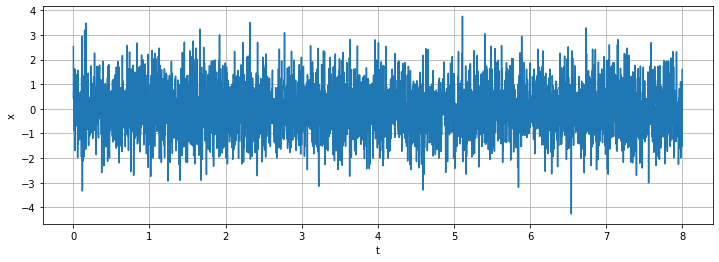

In [85]:
import math
import numpy
import random
from matplotlib.pyplot import *

def signal(t):
    return gauss(0,1)
# un signal aléatoire gaussien centré reduit

Ns = 4000
T = 8.0
dt = T/Ns
t = numpy.zeros(Ns)
x = numpy.zeros(Ns)
for k in range(Ns):
    t[k] = k*dt
    x[k] = signal(t[k])
figure(figsize=(12,4))
plot(t,x)
xlabel('t')
ylabel('x')
grid()


In [86]:
# l'autocorrelation est definit par Cn=1M∑k=iài+M-1 xkxk-n(2)
def autocorrel(x,N,i,M):
    C = numpy.zeros(N)
    for k in range(i,i+M):
        for n in range(N):
            C[n] += x[k]*x[k-n]
    return C/M    

C = [ 1.00573177  0.00608995  0.00720925 -0.01054896  0.00603179 -0.04097038
 -0.02094575 -0.00200341  0.00579929 -0.00997929]
R(10) =[[ 1.00573177  0.00608995  0.00720925 -0.01054896  0.00603179 -0.04097038
  -0.02094575 -0.00200341  0.00579929 -0.00997929]
 [-0.00997929  1.00573177  0.00608995  0.00720925 -0.01054896  0.00603179
  -0.04097038 -0.02094575 -0.00200341  0.00579929]
 [ 0.00579929 -0.00997929  1.00573177  0.00608995  0.00720925 -0.01054896
   0.00603179 -0.04097038 -0.02094575 -0.00200341]
 [-0.00200341  0.00579929 -0.00997929  1.00573177  0.00608995  0.00720925
  -0.01054896  0.00603179 -0.04097038 -0.02094575]
 [-0.02094575 -0.00200341  0.00579929 -0.00997929  1.00573177  0.00608995
   0.00720925 -0.01054896  0.00603179 -0.04097038]
 [-0.04097038 -0.02094575 -0.00200341  0.00579929 -0.00997929  1.00573177
   0.00608995  0.00720925 -0.01054896  0.00603179]
 [ 0.00603179 -0.04097038 -0.02094575 -0.00200341  0.00579929 -0.00997929
   1.00573177  0.00608995  0.00720925 -0.0

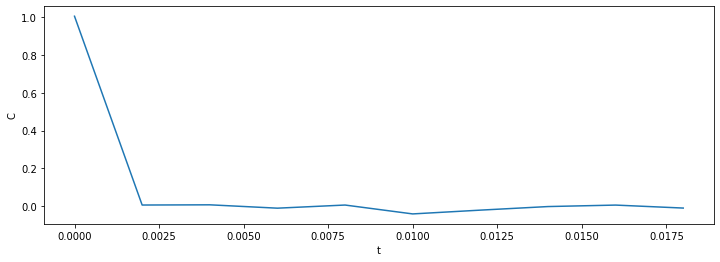

In [87]:
N = 10
temps = numpy.arange(N)*dt
#calcul des valeurs d'autocorrélation a l'aide de la fontion @autocorrel
C = autocorrel(x,N,N,Ns-N)

figure(figsize=(12,4))
plot(temps,C)
xlabel("t")
ylabel("C")

print('C = ' + str(C))

#le remplissage de la matrice d'autoccorélation
R=np.eye(10,10)

for i in range(10):
    for j in range(10):
        R[i][j] = C[j-i]

print('R(10) =' + str(R))

In [91]:
#les coeffs hi

R_inv = np.linalg.inv(R) #R-1

H = np.dot(R_inv,C)  # H = R-1*C

print(H)

for i in range(10):
    print('hi = ' + str(H[i]))



[ 9.98987235e-01  1.54710036e-02  1.88360882e-03 -9.40536188e-03
  2.63928823e-02  7.85003567e-04 -2.65130434e-02  8.17149163e-03
 -7.50682769e-04 -1.50221369e-02]
hi = 0.998987235104304
hi = 0.015471003576772117
hi = 0.001883608819019977
hi = -0.009405361882992158
hi = 0.026392882261811003
hi = 0.0007850035670235594
hi = -0.026513043415760093
hi = 0.008171491629015407
hi = -0.0007506827693751984
hi = -0.015022136889818922


In [93]:
def sm(h, x, N ,i):
    L = []
    for k in range(N):
        L = L + [h[k]*x[i-k-1]]
    return sum(L)

def erreur(x, h, i, N):
    return x[i]-sm(h,x,N,i)


e=[]
for i in range(10):
    e = e + [erreur(H, x, N-1, i)]

print('e[] = '+str(e))

e[] = [-0.015022136889818922, -0.01312906712434354, -0.016563886481956194, 0.004719276129578696, 0.003440073589691787, 0.00031661828204738486, -0.007995472592417988, -0.008456680065669759, -0.020169640038908764, -0.42542889751941576]
